In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/home/arunkhattri/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/arunkhattri/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/arunkhattri/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("../data/train.csv", nrows= 50000)

In [3]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns
sns.set()

/home/arunkhattri/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/arunkhattri/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Remove data with extreme outlier coordinates or negative fares

No handles with labels found to put in legend.


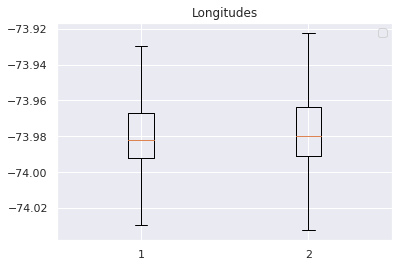

In [23]:
longs = [data.pickup_longitude, data.dropoff_longitude]
fig, ax = plt.subplots()
ax.set_title('Longitudes')
ax.boxplot(longs, showfliers=False)
ax.legend()
plt.show()

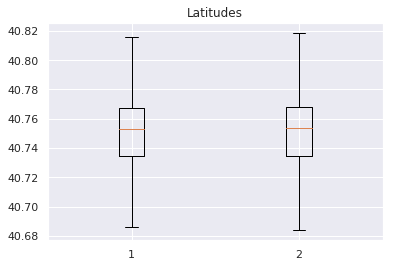

In [24]:
lats = [data.pickup_latitude, data.dropoff_latitude]
fig, ax = plt.subplots()
ax.set_title('Latitudes')
ax.boxplot(lats, showfliers=False)
plt.show()

In [26]:
# remove data with extremes
data = data.query('pickup_latitude > 40.68 and pickup_latitude < 40.82 and ' +
                 'dropoff_latitude > 40.68 and dropoff_latitude < 40.82 and ' +
                 'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                 'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                 'fare_amount > 0')
y = data.fare_amount
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33559 entries, 2 to 49999
Data columns (total 8 columns):
key                  33559 non-null object
fare_amount          33559 non-null float64
pickup_datetime      33559 non-null object
pickup_longitude     33559 non-null float64
pickup_latitude      33559 non-null float64
dropoff_longitude    33559 non-null float64
dropoff_latitude     33559 non-null float64
passenger_count      33559 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.3+ MB


In [27]:
base_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
x = data[base_features]
x.shape

(33559, 5)

In [30]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
print(f"Train x shape: {train_x.shape}")
print(f"Train y shape: {train_y.shape}")
print(f"val x shape: {val_x.shape}")
print(f"val y shape: {val_y.shape}")

Train x shape: (25169, 5)
Train y shape: (25169,)
val x shape: (8390, 5)
val y shape: (8390,)


In [31]:
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_x, train_y)

In [32]:
train_x.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,25169.000000,25169.000000,25169.000000,25169.000000,25169.000000
mean,-73.976556,40.757341,-73.974708,40.757796,1.653105
std,0.014879,0.020513,0.016392,0.022133,1.280760
min,-73.999999,40.680040,-73.999999,40.680035,0.000000
25%,-73.988014,40.744660,-73.986915,40.745348,1.000000
50%,-73.979439,40.758337,-73.978159,40.758817,1.000000
75%,-73.967089,40.770672,-73.964912,40.771843,2.000000
max,-73.900062,40.819887,-73.900062,40.819938,6.000000


In [33]:
train_y.describe()

count    25169.000000
mean         8.790283
std          4.945336
min          0.010000
25%          5.700000
50%          7.500000
75%         10.500000
max        165.000000
Name: fare_amount, dtype: float64

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

In [35]:
perm = PermutationImportance(first_model, random_state=1).fit(val_x, val_y)
eli5.show_weights(perm, feature_names = val_x.columns.tolist())

Weight,Feature
1.2409 ± 0.0186,dropoff_latitude
1.1505 ± 0.0825,pickup_latitude
0.5931 ± 0.0427,pickup_longitude
0.4969 ± 0.0239,dropoff_longitude
0.0020 ± 0.0022,passenger_count


Seems, latitude matters a lot for new york taxi's than longitude.
let's disentangle the latitude and longitudes by creating new features for longitudinal and latitudinal distance.
Then building a model with added features

In [37]:
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2 = ['pickup_longitude', 'pickup_latitude','abs_lon_change',
              'dropoff_longitude', 'dropoff_latitude','abs_lat_change']

x = data[features_2]
print(f"x shape: {x.shape}")
new_train_x, new_val_x, new_train_y, new_val_y = train_test_split(x, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_x, new_train_y)
perm2 = PermutationImportance(second_model, random_state=1).fit(new_val_x, new_val_y)
eli5.show_weights(perm2, feature_names= new_val_x.columns.tolist())

x shape: (33559, 6)


Weight,Feature
0.6675 ± 0.0429,abs_lat_change
0.3849 ± 0.0173,abs_lon_change
0.0500 ± 0.0074,dropoff_latitude
0.0407 ± 0.0061,dropoff_longitude
0.0279 ± 0.0103,pickup_latitude
0.0261 ± 0.0081,pickup_longitude
